In [111]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [124]:
import pandas as pd
import numpy as np
from save_recipes import agg_data
from featurize_ingredients import choose_top_grams, featurize_ingredients
import matplotlib.pyplot as plt

In [125]:
all_dfs_nutrient = agg_data()
all_dfs_nutrient.columns

60 datasets found


/Users/sleepearly/Projects/recipe_rex/save_recipes.py:24: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  nutrient_df = pd.DataFrame(all_dfs['nutrients'].values.tolist(), index = all_dfs.index)


number of recipes 2046
498 unigrams occur over 20 times
491 bigrams occur over 20 times


Index(['title', 'author', 'url', 'cuisine', 'image_url', 'ingredients',
       'instructions', 'language', 'ratings', 'reviews', 'site_name',
       'total_time', 'yields', 'servingSize', 'calories',
       'carbohydrateContent', 'proteinContent', 'fatContent',
       'saturatedFatContent', 'cholesterolContent', 'sodiumContent',
       'sugarContent', 'fiberContent', 'transFatContent',
       'unsaturatedFatContent', 'ingredients_encoding'],
      dtype='object')

498 unigrams occur over 20 times
491 bigrams occur over 20 times


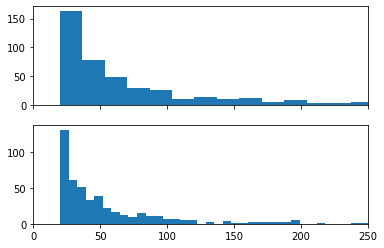

In [116]:
# Get top grams
top_unigram_cts, top_bigram_cts, gram2idx = choose_top_grams(all_dfs_nutrient)

# Plot top occurring ingredients (long tail unploted)
fig, axs = plt.subplots(2,1, sharex=True)
axs[0].set_xlim([0,250])
_ = axs[0].hist(top_unigram_cts.values(), bins=200)
_ = axs[1].hist(top_bigram_cts.values(), bins=200)

Number of ingredient grams per recipe


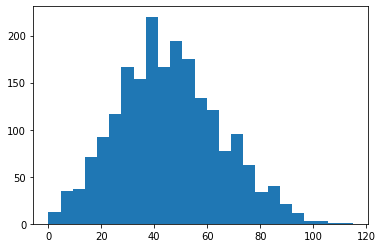

In [123]:
# Featurize ingredients
all_dfs_nutrient = featurize_ingredients(all_dfs_nutrient, gram2idx)

print("Number of ingredient grams per recipe")
encodings = np.stack(all_dfs_nutrient["ingredients_encoding"])
_ = plt.hist(np.sum(encodings, axis=1), bins=25)